## Auto-Regressive Moving Average (ARMA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r"Downloads\Index2018.csv")
df_copy = df.copy()
df_copy.date = pd.to_datetime(df_copy.date, dayfirst = True)
df_copy.set_index('date', inplace = True)
df_copy = df_copy.asfreq('b')
df_copy = df_copy.fillna(method = 'ffill')
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df_copy['market_val'] = df_copy.ftse

In [4]:
df_copy = df_copy.drop(['spx','dax', 'ftse', 'nikkei'], axis = 1)
df_copy.head()

,market_val
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [5]:
df_copy['returns'] = df_copy.market_val.pct_change(1).mul(100)

In [6]:
df_copy.isnull().sum()

market_val    0
returns       1
dtype: int64

## ARMA (1,1)

In [7]:
model_arma_ret_1 = ARMA(df_copy.returns[1:], order = (1,1))
results_arma_ret_1 = model_arma_ret_1.fit()
results_arma_ret_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 1)   Log Likelihood               -9582.339
Method:                       css-mle   S.D. of innovations              1.114
Date:                Mon, 19 Oct 2020   AIC                          19172.679
Time:                        11:16:10   BIC                          19199.657
Sample:                    01-10-1994   HQIC                         19182.026
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.753      0.080      -0.002       0.040
ar.L1.returns     0.8177      0.063     12.964      0.000       0.694       0.941
ma.L1.returns    -0.8593      0.056    -15.284      0.000      -0.970      -0.749
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2229           +0.0000j            1.2229            0.0000
MA.1            1.1637           +0.0000j            1.1637            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
model_ar_ret_1 = ARMA(df_copy.returns[1:], order = (1,0))
model_ma_ret_1 = ARMA(df_copy.returns[1:], order = (0,1))

In [9]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [10]:
print("For ARMA Vs MA: \n p_val = " +str(LLR_test(model_ma_ret_1, model_arma_ret_1)))
print("For ARMA Vs AR: \n p_val = " +str(LLR_test(model_ar_ret_1, model_arma_ret_1)))

For ARMA Vs MA: 
 p_val = 0.0
For ARMA Vs AR: 
 p_val = 0.0


Here we can see pval is less than 0.05 this states that ARMA(1,1) model better for returns than AR(1) and MA(1) models.

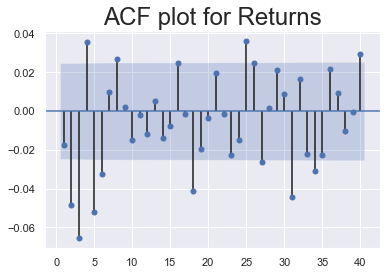

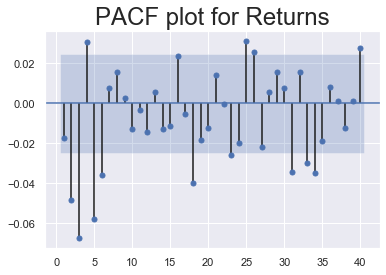

In [11]:
sgt.plot_acf(df_copy.returns[1:], zero = False, lags = 40)
plt.title("ACF plot for Returns", size = 24);
sgt.plot_pacf(df_copy.returns[1:], zero = False, lags = 40)
plt.title("PACF plot for Returns", size = 24);

Here the plots depicts that from ACF we can say that not more than 8 lags are required for AR and PACF states that not more than 6 lags are required for MA model for giving better results. Thus instead considering ARMA(8,6) we'll consider ARMA(4,3).

## Higher Lag ARMA models

In [12]:
model_arma_ret_33 = ARMA(df_copy.returns[1:], order = (3,3))
results_arma_ret_33 = model_arma_ret_33.fit()
print(results_arma_ret_33.summary())
print("LLR test results : \n p_val = " +str(LLR_test(model_arma_ret_1, model_arma_ret_33, DF = 4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 3)   Log Likelihood               -9564.828
Method:                       css-mle   S.D. of innovations              1.111
Date:                Mon, 19 Oct 2020   AIC                          19145.656
Time:                        11:16:26   BIC                          19199.612
Sample:                    01-10-1994   HQIC                         19164.351
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.664      0.096      -0.003       0.041
ar.L1.returns    -0.1278      0.106     -1.202      0.229      -0.336       0.081
ar.L2.returns    -0.2079      0.097     

Result states that ARMA(3,3) is better than ARMA(1,1).

In [13]:
model_arma_ret_32 = ARMA(df_copy.returns[1:], order = (3,2))
results_arma_ret_32 = model_arma_ret_32.fit()
print(results_arma_ret_32.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 2)   Log Likelihood               -9568.878
Method:                       css-mle   S.D. of innovations              1.112
Date:                Mon, 19 Oct 2020   AIC                          19151.755
Time:                        11:16:40   BIC                          19198.967
Sample:                    01-10-1994   HQIC                         19168.113
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.472      0.141      -0.006       0.044
ar.L1.returns    -0.6818      0.113     -6.025      0.000      -0.904      -0.460
ar.L2.returns    -0.3567      0.157     

In [14]:
model_arma_ret_23 = ARMA(df_copy.returns[1:], order = (2,3))
results_arma_ret_23 = model_arma_ret_23.fit()
print(results_arma_ret_23.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(2, 3)   Log Likelihood               -9567.739
Method:                       css-mle   S.D. of innovations              1.111
Date:                Mon, 19 Oct 2020   AIC                          19149.477
Time:                        11:16:44   BIC                          19196.689
Sample:                    01-10-1994   HQIC                         19165.835
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.524      0.128      -0.005       0.043
ar.L1.returns    -0.5382      0.155     -3.477      0.001      -0.842      -0.235
ar.L2.returns    -0.1025      0.212     

In [15]:
model_arma_ret_22 = ARMA(df_copy.returns[1:], order = (2,2))
results_arma_ret_22 = model_arma_ret_22.fit()
print(results_arma_ret_22.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(2, 2)   Log Likelihood               -9579.077
Method:                       css-mle   S.D. of innovations              1.113
Date:                Mon, 19 Oct 2020   AIC                          19170.154
Time:                        11:16:51   BIC                          19210.621
Sample:                    01-10-1994   HQIC                         19184.175
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.649      0.099      -0.004       0.042
ar.L1.returns     0.7792      0.225      3.470      0.001       0.339       1.219
ar.L2.returns    -0.1203      0.184     

In [16]:
model_arma_ret_13 = ARMA(df_copy.returns[1:], order = (1,3))
results_arma_ret_13 = model_arma_ret_13.fit()
print(results_arma_ret_13.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 3)   Log Likelihood               -9567.841
Method:                       css-mle   S.D. of innovations              1.111
Date:                Mon, 19 Oct 2020   AIC                          19147.682
Time:                        11:16:54   BIC                          19188.149
Sample:                    01-10-1994   HQIC                         19161.703
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.543      0.123      -0.005       0.043
ar.L1.returns    -0.4765      0.104     -4.583      0.000      -0.680      -0.273
ma.L1.returns     0.4581      0.104     

In [17]:
print("ARMA (1,3): \n LL = ", results_arma_ret_13.llf,"\t AIC = ", results_arma_ret_13.aic)
print("ARMA (3,2): \n LL = ", results_arma_ret_32.llf,"\t AIC = ", results_arma_ret_32.aic)

ARMA (1,3): 
 LL =  -9567.84108913108 	 AIC =  19147.68217826216
ARMA (3,2): 
 LL =  -9568.877658906495 	 AIC =  19151.75531781299


Thus we conclude ARMA(1,3) is better than ARMA(3,2)

## Residuals for Returns

In [18]:
df_copy['res_ret_arma13'] = results_arma_ret_13.resid[1:]

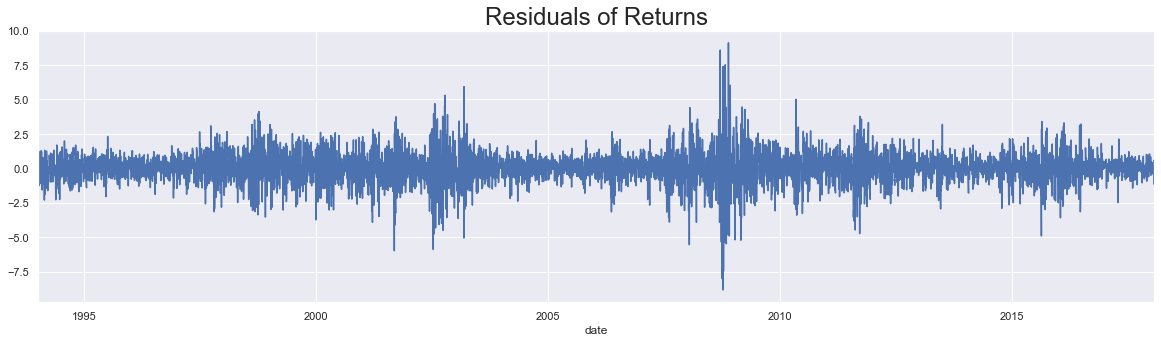

In [19]:
df_copy.res_ret_arma13.plot(figsize = (20,5))
plt.title('Residuals of Returns', size = 24)
plt.show()

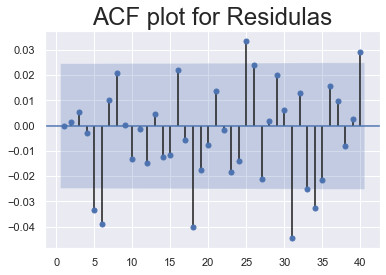

In [20]:
sgt.plot_acf(df_copy.res_ret_arma13[2:], zero = False, lags = 40)
plt.title("ACF plot for Residulas", size = 24);

## Revaluating Model Selection

In [21]:
model_arma_ret_51 = ARMA(df_copy.returns[1:], order = (5,1))
results_arma_ret_51 = model_arma_ret_51.fit()
print(results_arma_ret_51.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(5, 1)   Log Likelihood               -9559.969
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19135.937
Time:                        11:16:58   BIC                          19189.893
Sample:                    01-10-1994   HQIC                         19154.632
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.640      0.101      -0.004       0.042
ar.L1.returns     0.3194      0.135      2.364      0.018       0.055       0.584
ar.L2.returns    -0.0457      0.014     

In [22]:
model_arma_ret_15 = ARMA(df_copy.returns[1:], order = (1,5))
results_arma_ret_15 = model_arma_ret_15.fit()
print(results_arma_ret_15.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 5)   Log Likelihood               -9561.034
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 19 Oct 2020   AIC                          19138.068
Time:                        11:17:02   BIC                          19192.024
Sample:                    01-10-1994   HQIC                         19156.762
                         - 01-29-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.011      1.660      0.097      -0.003       0.041
ar.L1.returns     0.3000      0.152      1.975      0.048       0.002       0.598
ma.L1.returns    -0.3202      0.151     

In [23]:
print("ARMA (1,5): \n LL = ", results_arma_ret_15.llf,"\t AIC = ", results_arma_ret_15.aic)
print("ARMA (5,1): \n LL = ", results_arma_ret_51.llf,"\t AIC = ", results_arma_ret_51.aic)

ARMA (1,5): 
 LL =  -9561.03380107091 	 AIC =  19138.06760214182
ARMA (5,1): 
 LL =  -9559.968621203789 	 AIC =  19135.937242407577


In [24]:
print("ARMA (1,3): \n LL = ", results_arma_ret_13.llf,"\t AIC = ", results_arma_ret_13.aic)
print("ARMA (5,1): \n LL = ", results_arma_ret_51.llf,"\t AIC = ", results_arma_ret_51.aic)

ARMA (1,3): 
 LL =  -9567.84108913108 	 AIC =  19147.68217826216
ARMA (5,1): 
 LL =  -9559.968621203789 	 AIC =  19135.937242407577


Thus we can see low AIC hence ARMA(5,1) is the best model so far.

## Residuals for New Model

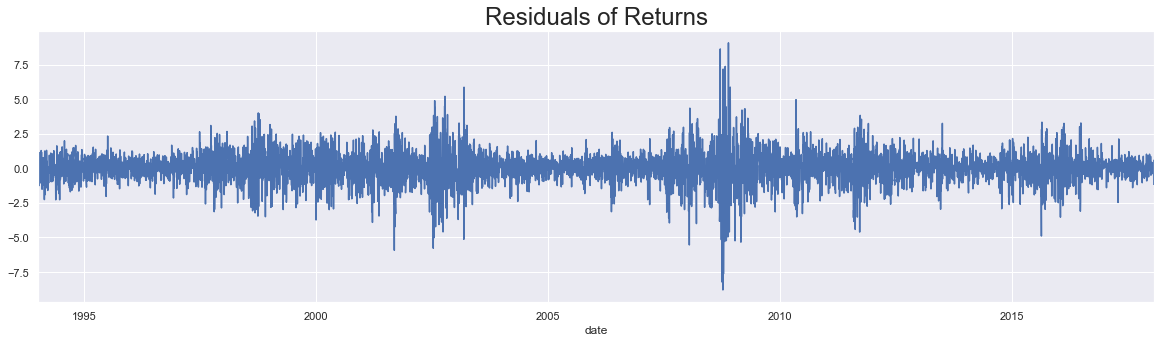

In [25]:
df_copy['res_ret_arma51'] = results_arma_ret_51.resid
df_copy.res_ret_arma51.plot(figsize = (20,5))
plt.title('Residuals of Returns', size = 24)
plt.show()

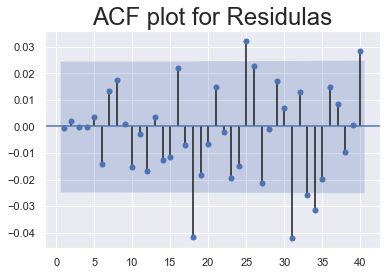

In [26]:
sgt.plot_acf(df_copy.res_ret_arma51[1:], zero = False, lags = 40)
plt.title("ACF plot for Residulas", size = 24);

Random residulas as usually prefered.

## ARMA Models for Prices

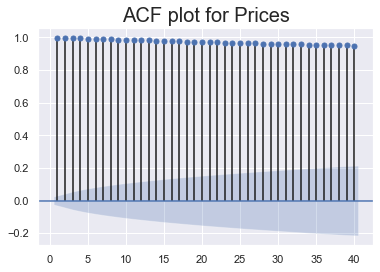

In [27]:
sgt.plot_acf(df_copy.market_val, unbiased = True, zero = False, lags = 40)
plt.title("ACF plot for Prices", size = 20);

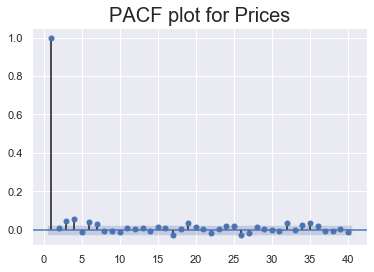

In [28]:
sgt.plot_pacf(df_copy.market_val, alpha = 0.05, zero = False, lags = 40, method = ('ols'))
plt.title("PACF plot for Prices", size = 20);

In [29]:
model_arma_price_1 = ARMA(df_copy.market_val, order = (1,1))
results_arma_price_1 = model_arma_price_1.fit()
results_arma_price_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             market_val   No. Observations:                 6277
Model:                     ARMA(1, 1)   Log Likelihood              -34437.717
Method:                       css-mle   S.D. of innovations             58.376
Date:                Mon, 19 Oct 2020   AIC                          68883.434
Time:                        11:17:08   BIC                          68910.413
Sample:                    01-07-1994   HQIC                         68892.782
                         - 01-29-2018                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5423.6804    667.930      8.120      0.000    4114.562    6732.799
ar.L1.market_val     0.9991      0.001   1732.615      0.000       0.998       1.000
ma.L1.market_val    -0.0095      0.013     -0.715      0.475      -0.036       0.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
MA.1          105.1610           +0.0000j          105.1610            0.0000
-----------------------------------------------------------------------------
"""

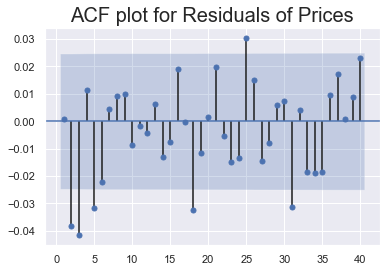

In [30]:
df_copy['res_price_arma1'] = results_arma_price_1.resid
sgt.plot_acf(df_copy.res_price_arma1, unbiased = True, zero = False, lags = 40)
plt.title("ACF plot for Residuals of Prices", size = 20);

In [31]:
model_arma_price_66 = ARMA(df_copy.market_val, order = (6,6))
results_arma_price_66 = model_arma_price_66.fit(start_ar_lags = 14)
print(results_arma_price_66.summary())

                              ARMA Model Results                              
Dep. Variable:             market_val   No. Observations:                 6277
Model:                     ARMA(6, 6)   Log Likelihood              -34412.966
Method:                       css-mle   S.D. of innovations             58.145
Date:                Mon, 19 Oct 2020   AIC                          68853.933
Time:                        11:17:21   BIC                          68948.358
Sample:                    01-07-1994   HQIC                         68886.649
                         - 01-29-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5423.6953    796.359      6.811      0.000    3862.861    6984.530
ar.L1.market_val     0.7434      0.192      3.866      0.000       0.367       1.120
ar.L2.market_val     0.3862 

In [32]:
model_arma_price_56 = ARMA(df_copy.market_val, order = (5,6))
results_arma_price_56 = model_arma_price_56.fit(start_ar_lags = 14)
print(results_arma_price_56.summary())

                              ARMA Model Results                              
Dep. Variable:             market_val   No. Observations:                 6277
Model:                     ARMA(5, 6)   Log Likelihood              -34412.988
Method:                       css-mle   S.D. of innovations             58.145
Date:                Mon, 19 Oct 2020   AIC                          68851.976
Time:                        11:17:38   BIC                          68939.657
Sample:                    01-07-1994   HQIC                         68882.356
                         - 01-29-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5423.6938    794.124      6.830      0.000    3867.239    6980.149
ar.L1.market_val     0.7333      0.190      3.858      0.000       0.361       1.106
ar.L2.market_val     0.3804 

In [33]:
model_arma_price_61 = ARMA(df_copy.market_val, order = (6,1))
results_arma_price_61 = model_arma_price_61.fit(start_ar_lags = 14)
print(results_arma_price_61.summary())

                              ARMA Model Results                              
Dep. Variable:             market_val   No. Observations:                 6277
Model:                     ARMA(6, 1)   Log Likelihood              -34415.130
Method:                       css-mle   S.D. of innovations             58.165
Date:                Mon, 19 Oct 2020   AIC                          68848.260
Time:                        11:17:51   BIC                          68908.962
Sample:                    01-07-1994   HQIC                         68869.292
                         - 01-29-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5423.6809    813.774      6.665      0.000    3828.714    7018.648
ar.L1.market_val     1.3578      0.027     50.251      0.000       1.305       1.411
ar.L2.market_val    -0.4036 

In [34]:
print("ARMA (5,6): \n LL = ", results_arma_price_56.llf,"\t AIC = ", results_arma_price_56.aic)
print("ARMA (6,1): \n LL = ", results_arma_price_61.llf,"\t AIC = ", results_arma_price_61.aic)

ARMA (5,6): 
 LL =  -34412.98817647654 	 AIC =  68851.97635295308
ARMA (6,1): 
 LL =  -34415.130137336826 	 AIC =  68848.26027467365


Thus ARMA(6,1) should be preferred over ARMA(5,6)

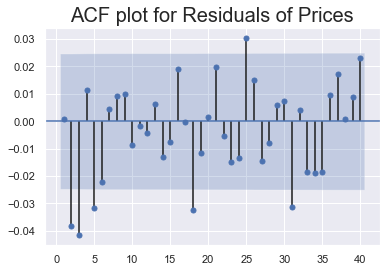

In [35]:
df_copy['res_price_arma61'] = results_arma_price_61.resid
sgt.plot_acf(df_copy.res_price_arma1, unbiased = True, zero = False, lags = 40)
plt.title("ACF plot for Residuals of Prices", size = 20);

In [36]:
print("ARMA (5,6): \n LL = ", results_arma_price_56.llf,"\t AIC = ", results_arma_price_56.aic)
print("ARMA (6,1): \n LL = ", results_arma_price_61.llf,"\t AIC = ", results_arma_price_61.aic)
print("ARMA (5,1): \n LL = ", results_arma_ret_51.llf,"\t AIC = ", results_arma_ret_51.aic)

ARMA (5,6): 
 LL =  -34412.98817647654 	 AIC =  68851.97635295308
ARMA (6,1): 
 LL =  -34415.130137336826 	 AIC =  68848.26027467365
ARMA (5,1): 
 LL =  -9559.968621203789 	 AIC =  19135.937242407577


Thus we can see that ARMA model performs better for Stationary data